In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My Drive/Colab Notebooks/Waste Classification

/content/drive/My Drive/Colab Notebooks/Waste Classification


In [ ]:
import os
import pathlib
import random
import numpy as np
from numpy import save
from imutils import paths
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.applications import imagenet_utils  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten

Using TensorFlow backend.


## Feature extraction

### Chuẩn bị dữ liệu



Load ảnh và resize về 224,224

In [ ]:
# Data train
# Take image path
data_train = pathlib.Path('DATASET/TRAIN')
image_path = list(data_train.glob('*/*'))
image_path = [str(path) for path in image_path]
random.shuffle(image_path)
# Take labels train
labels = [p.split(os.path.sep)[-2] for p in image_path]
# convert labels to number
lab = LabelEncoder()
labels = lab.fit_transform(labels)

print(len(image_path))

20064


In [ ]:
# Data val
# Take image path
data_val = pathlib.Path('DATASET/VAL')
image_path_val = list(data_val.glob('*/*'))
image_path_val = [str(path) for path in image_path_val]
random.shuffle(image_path)
# Take labels train
labels = [p.split(os.path.sep)[-2] for p in image_path_val]
# convert labels to number
lab = LabelEncoder()
labels_val = lab.fit_transform(labels)

print(len(image_path_val))

2500


In [ ]:
# Data test
# Take image path
data_test = pathlib.Path('DATASET/TEST')
image_path_test = list(data_test.glob('*/*'))
image_path_test = [str(path) for path in image_path_test]
random.shuffle(image_path)
# Take labels train
labels = [p.split(os.path.sep)[-2] for p in image_path_test]
# convert labels to number
lab = LabelEncoder()
labels_test = lab.fit_transform(labels)

print(len(image_path_test))

2513


In [ ]:
def load_resize_image(image_path):
  list_image = []
  for (j, imagePath) in enumerate(image_path):
      image = load_img(imagePath, target_size=(224, 224))
      image = img_to_array(image)
      image = np.expand_dims(image, 0)
      image = imagenet_utils.preprocess_input(image)
      list_image.append(image)
  list_image = np.vstack(list_image)
  return list_image

In [ ]:
x_train = load_resize_image(image_path)

In [ ]:
x_val = load_resize_image(image_path_val)

In [ ]:
x_test = load_resize_image(image_path_test)

In [ ]:
y_train = labels
y_val = labels_val
y_test = labels_test

### Sử dụng VGG16 để rút trích đặc trưng từ hình ảnh

In [ ]:
# Load model VGG16
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
features1 = model.predict(x_train)
x_train = features1.reshape((features1.shape[0], 512*7*7))

In [ ]:
features2 = model.predict(x_val)
x_val = features2.reshape((features2.shape[0], 512*7*7))

In [ ]:
features3 = model.predict(x_test)
x_test = features3.reshape((features3.shape[0], 512*7*7))

In [ ]:
x_train = np.load('x_train.npy')
x_val = np.load('x_val1.npy')
x_test = np.load('x_test1.npy')

In [ ]:
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

In [ ]:
print('X train: ',x_train.shape)
print('Y train: ',y_train.shape)
print('X valid: ',x_val.shape)
print('Y valid: ',y_val.shape)
print('X test: ',x_test.shape)
print('Y test: ',y_test.shape)

X train:  (20064, 25088)
Y train:  (20064,)
X valid:  (2500, 25088)
Y valid:  (2500,)
X test:  (2513, 25088)
Y test:  (2513,)


### Dùng thuật toán Logistic Regression để phân loại và đánh giá mô hình

In [ ]:
# Train model by Logistic Regression
params = {'C' : [0.1, 1.0, 10.0, 100.0]}
model = GridSearchCV(LogisticRegression(), params)
model.fit(x_train, y_train)
print('Best parameter for the model {}'.format(model.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameter for the model {'C': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1400
           1       0.93      0.94      0.93      1100

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



In [ ]:
from sklearn.metrics import roc_auc_score

print('AUC: ',roc_auc_score(y_val, y_pred))

AUC:  0.9417532467532469


In [ ]:
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1401
           1       0.97      0.81      0.88      1112

    accuracy                           0.90      2513
   macro avg       0.92      0.90      0.90      2513
weighted avg       0.91      0.90      0.90      2513



In [ ]:
from sklearn.metrics import roc_auc_score

print('AUC: ',roc_auc_score(y_test, y_predict))

AUC:  0.8951330370393193


In [ ]:
import pickle

pickle.dump(model, open('vgg16_logistic', 'wb'))

## Fine tuning

### Chuẩn bị dữ liệu

In [ ]:
train_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

train_dir = 'DATASET/TRAIN/'
valid_dir = 'DATASET/VAL'

bs = 128
train_generator = train_gen.flow_from_directory(train_dir, batch_size = bs, target_size = (224, 224), class_mode = 'binary')
valid_generator = valid_gen.flow_from_directory(valid_dir, batch_size = bs, target_size = (224, 224), class_mode = 'binary')


print(train_generator)
print(valid_generator)

Found 20064 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### Xây dựng mô hình mới dựa trên VGG16

In [ ]:
baseModel = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.layers import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization

# Built new model base on VGG16
fcHead = baseModel.output
# Add flatten layer
fcHead = BatchNormalization(name='BN')(fcHead)
fcHead = Flatten(name='flatten')(fcHead)
# Add FC
fcHead = Dense(512, activation='relu')(fcHead)
fcHead = Dense(256, activation='relu')(fcHead)
fcHead = Dense(128, activation='relu')(fcHead)
fcHead = Dropout(0.5)(fcHead)
# Output layer with softmax activation
fcHead = Dense(2, activation='softmax')(fcHead)

model = Model(inputs=baseModel.input, outputs=fcHead)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

for layer in baseModel.layers:
    layer.trainable = False
    
opt = SGD(lr=1e-4, momentum=0.7)
model.compile(opt, 'sparse_categorical_crossentropy', ['accuracy'])
numOfEpoch = 40
len_train = 20064
len_valid = 2500

checkpoint = ModelCheckpoint(filepath = 'vgg16_ft.hdf5', verbose = 1, save_best_only = True)
earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 15, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped
ReduceLR = ReduceLROnPlateau(patience=3, verbose=1)
callbacks = [earlystop, checkpoint, ReduceLR]                          
H = model.fit_generator(train_generator, 
                        steps_per_epoch=len_train//bs,
                        validation_data=valid_generator,
                        validation_steps=len_valid//bs,
                        epochs=numOfEpoch,
                        callbacks = callbacks,
                        use_multiprocessing=True,
                        workers=0)

Epoch 1/40
156/156 [==============================] - 18945s 121s/step - loss: 0.8440 - accuracy: 0.6005 - val_loss: 0.5270 - val_accuracy: 0.7516

Epoch 00001: val_loss improved from inf to 0.52701, saving model to vgg16_ft.hdf5
Epoch 2/40
156/156 [==============================] - 11158s 72s/step - loss: 0.5964 - accuracy: 0.7048 - val_loss: 0.4321 - val_accuracy: 0.8170

Epoch 00002: val_loss improved from 0.52701 to 0.43210, saving model to vgg16_ft.hdf5
Epoch 3/40
156/156 [==============================] - 11115s 71s/step - loss: 0.5231 - accuracy: 0.7514 - val_loss: 0.3854 - val_accuracy: 0.8326

Epoch 00003: val_loss improved from 0.43210 to 0.38536, saving model to vgg16_ft.hdf5
Epoch 4/40
 28/156 [====>.........................] - ETA: 2:15:11 - loss: 0.4833 - accuracy: 0.7708

### Đánh giá mô hình

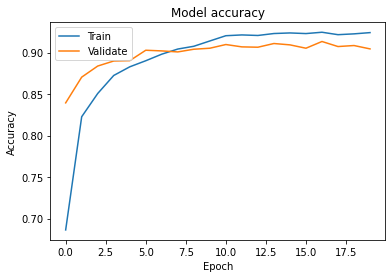

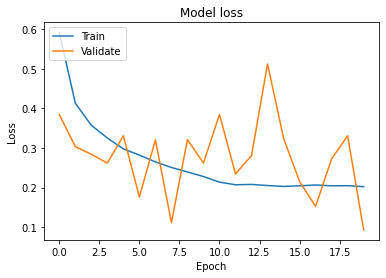

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
from keras import models 
from keras.models import load_model

model = load_model('vgg16_bnconv07.hdf5')
model.load_weights('vgg16_bnconv07.hdf5')

In [ ]:
x_test = np.load('x_test2.npy')
y_test = np.load('y_test2.npy')

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_pred = list()
for i in range(0,2513):
  if y_predict[i][0]>y_predict[i][1]:
    y_pred.append(0)
  else:
    y_pred.append(1)
y = np.asarray(y_pred, dtype=np.float32)

In [ ]:
from sklearn.metrics import roc_auc_score

print('AUC: ',roc_auc_score(y_test, y))

AUC:  0.7020788080456405


In [ ]:
print(classification_report(y_test, y))

              precision    recall  f1-score   support

         0.0       0.79      0.61      0.69      1401
         1.0       0.62      0.79      0.69      1112

    accuracy                           0.69      2513
   macro avg       0.70      0.70      0.69      2513
weighted avg       0.71      0.69      0.69      2513



0


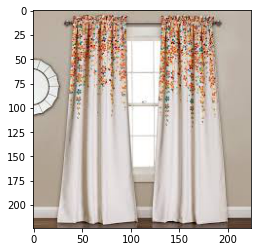

In [ ]:
from keras.preprocessing import image
img = image.load_img("DATASET/TEST/R/R_10034.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
y_ = model.predict(img)
if (y_[0][0]> y_[0][1]):
  print('O')
else:
  print('R')

In [ ]:
import tensorflow as tf
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing import image
import PIL

from sklearn.preprocessing import LabelEncoder

from keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Input
%matplotlib inline

Using TensorFlow backend.


In [ ]:
res = ResNet50(input_shape = (224, 224, 3), include_top = True, weights = 'imagenet')
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in res.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f6fbd87de80> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f6f73de9eb8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6f73e06780> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f6f73e064a8> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f6f735c0be0> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f6f735c0208> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f6f6db1ccf8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6f6db28128> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f6f6dad09e8> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f6f6dad6b70> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6f6dad6358> True
<tensorflow.python.keras.layers.normaliz

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256256    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 25,893,482
Trainable params: 25,840,362
Non-trainable params: 53,120
_________________________________________________________________


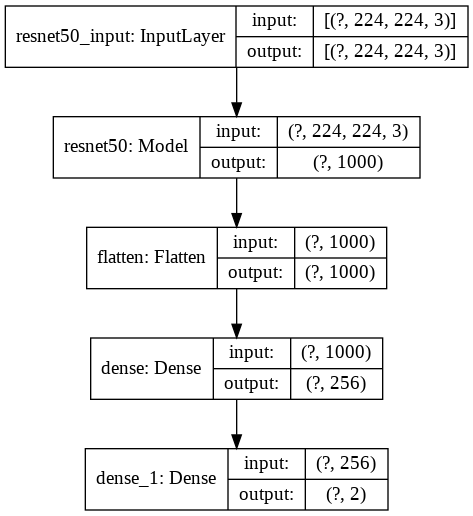

In [ ]:
model = tf.keras.models.Sequential()
model.add(res)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
from keras import models 
from keras.models import load_model

model.load_weights('10epoch.h5')

O


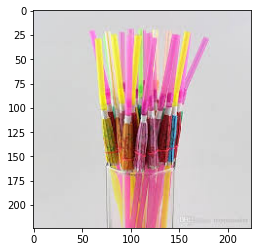

In [ ]:
from keras.preprocessing import image
img = image.load_img("DATASET/TEST/R/R_10595.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
y_ = model.predict(img)
if (y_[0][0]> y_[0][1]):
  print('O')
else:
  print('R')

In [ ]:
x_test = np.load('x_test2.npy')
y_test = np.load('y_test2.npy')

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict[0]

array([0.99479634, 0.00520373], dtype=float32)

In [ ]:
y_test[0]

0.0

In [ ]:
y_pred = list()
for i in range(0,2513):
  if y_predict[i][0]>y_predict[i][1]:
    y_pred.append(0)
  else:
    y_pred.append(1)
y = np.asarray(y_pred, dtype=np.float32)

In [ ]:
from sklearn.metrics import roc_auc_score

print('AUC: ',roc_auc_score(y_test, y))

AUC:  0.5


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y))

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72      1401
         1.0       0.00      0.00      0.00      1112

    accuracy                           0.56      2513
   macro avg       0.28      0.50      0.36      2513
weighted avg       0.31      0.56      0.40      2513



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
